<a href="https://colab.research.google.com/github/Jyunci/AIoT_cute_surface_inspection/blob/main/UNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **表面瑕疵檢測**

使用 U-net 模型，預測表面瑕疵的  [位置]  及  [種類]  。

資料來源：公開資料集 Kaggle 平台 --- Severstal: Steel Defect Detection。

連結：https://www.kaggle.com/c/severstal-steel-defect-detection

## 前置作業 - 函式庫環境設置

In [1]:
# 共通函式庫
from PIL import Image, ImageDraw
import numpy as np
import os, cv2, math
from os import urandom
from scipy import ndimage
import matplotlib

## 前置作業 - 資料下載  (從 github clone 檔案)

In [2]:
!git clone https://github.com/Jyunci/AIoT_cute_surface_inspection.git

Cloning into 'AIoT_cute_surface_inspection'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 12869 (delta 1), reused 3 (delta 0), pack-reused 12863
Receiving objects: 100% (12869/12869), 790.66 MiB | 33.60 MiB/s, done.
Resolving deltas: 100% (5446/5446), done.
Checking out files: 100% (12552/12552), done.


In [3]:
def get_data( wheres, resie_row,  resie_col, channels ):

    ylst=[]
    imList = []
    
    for imageName in sorted(os.listdir(wheres)):
        if (matplotlib.pyplot.imread(wheres + os.sep + imageName)).ndim ==2:
            imagetensor = matplotlib.pyplot.imread(wheres + os.sep + imageName)
            imagetensor = cv2.cvtColor(imagetensor,cv2.COLOR_GRAY2RGB)
        else:
            imagetensor = matplotlib.pyplot.imread(wheres + os.sep + imageName)
        if channels == 0 :
            imagetensor = cv2.cvtColor(imagetensor, cv2.COLOR_BGR2GRAY)
                
        imagetensor = cv2.resize(imagetensor, (resie_row, resie_col), interpolation=cv2.INTER_CUBIC)/255
        



        imList.append(imagetensor)
        
    imTensor = np.asarray(imList).astype("float")
    
    return imTensor 

In [4]:
# from google.colab import drive
# # 將自己的雲端硬碟掛載上去
# drive.mount('/content/gdrive')


In [5]:
wheres = '/content/AIoT_cute_surface_inspection/defect_data/train(5118)/shapes_train2018'

In [6]:
tensor  = get_data( wheres, 128, 128, 1 )
tensor.shape

(4828, 128, 128, 3)

Populating the interactive namespace from numpy and matplotlib


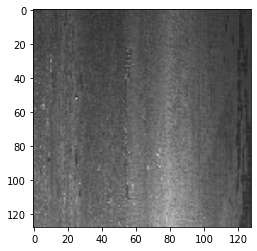

In [7]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgplot = plt.imshow(tensor[0,:,:,:])
plt.show()

In [8]:
wheres1 = '/content/AIoT_cute_surface_inspection/defect_data/train(5118)/masks'

In [9]:
masks  = get_data( wheres1, 128, 128, 0)

In [10]:
masks = masks.reshape(( masks.shape[0], masks.shape[1], masks.shape[2], 1))
masks.shape

(4828, 128, 128, 1)

Populating the interactive namespace from numpy and matplotlib


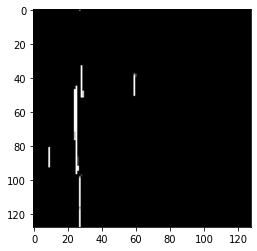

In [11]:
%pylab inline

imgplot = plt.imshow(masks[0,:,:,0],cmap='gray')
plt.show()

In [12]:
w_, h_ = tensor.shape[1], tensor.shape[2]

In [13]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

In [14]:
import keras
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Input
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Input, Dense,Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D,Conv3D,Conv1D
from keras.layers import concatenate

In [15]:
input_img = Input(shape=(w_, h_ , 3))

In [16]:
# U-Net
# https://www.kaggle.com/jesperdramsch/intro-chest-xray-dicom-viz-u-nets-full-data#Vanilla-Unet

input_shape = (128, 128, 3)
inputs = Input(input_shape)

c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (inputs)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(64, (3, 3), activation='relu', padding='same') (p4)
c5 = Conv2D(64, (3, 3), activation='relu', padding='same') (c5)
p5 = MaxPooling2D(pool_size=(2, 2)) (c5)

c55 = Conv2D(128, (3, 3), activation='relu', padding='same') (p5)
c55 = Conv2D(128, (3, 3), activation='relu', padding='same') (c55)

u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c55)
u6 = concatenate([u6, c5])
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

u71 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u71 = concatenate([u71, c4])
c71 = Conv2D(32, (3, 3), activation='relu', padding='same') (u71)
c61 = Conv2D(32, (3, 3), activation='relu', padding='same') (c71)

u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c61)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])


model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 8)  224         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 8)  584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 8)    0           conv2d_1[0][0]                   
_______________________________________________________________________________________

In [17]:
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
train_history = model.fit(tensor, masks, shuffle=True, epochs=2, batch_size=512)

Epoch 1/15
19/19 [==============================] - 294s 15s/step - loss: 0.6691 - accuracy: 0.9375
Epoch 2/15
19/19 [==============================] - 295s 16s/step - loss: 0.6490 - accuracy: 0.9397
Epoch 3/15
19/19 [==============================] - 294s 15s/step - loss: 0.5987 - accuracy: 0.9397
Epoch 4/15
19/19 [==============================] - 290s 15s/step - loss: 0.3822 - accuracy: 0.9397
Epoch 5/15
19/19 [==============================] - 291s 15s/step - loss: 0.2903 - accuracy: 0.9397
Epoch 6/15
19/19 [==============================] - 290s 15s/step - loss: 0.2766 - accuracy: 0.9397
Epoch 7/15
19/19 [==============================] - 292s 15s/step - loss: 0.2614 - accuracy: 0.9397
Epoch 8/15
19/19 [==============================] - 292s 15s/step - loss: 0.2443 - accuracy: 0.9397
Epoch 9/15
18/19 [===========================>..] - ETA: 15s - loss: 0.2332 - accuracy: 0.9398

KeyboardInterrupt: ignored

In [ ]:
ss = model.predict(tensor)
ss.shape

In [ ]:
imgplot = plt.imshow(ss[0,:,:,0], cmap='gray')
plt.show()